# Particle Swarm Optimization

In chapter 4 we're given tips on parameter tuning, and how it can affect the solution 
finding process.

In [81]:
import numpy as np
import matplotlib.pyplot as plt

In [82]:
def objective_function(particle):
    """quadratic function"""
    x, y = particle.position
    return x**2 + y**2

In [83]:
class Swarm:
    def __init__(self, num_particles, search_space, c1=2, c2=2, inertia=0.7):
        self.search_space = search_space
        self.particles = [Particle(search_space, c1, c2, inertia) 
                          for _ in range(num_particles)]
        self.global_best_position = np.array([0, 0])
        self.global_best_fitness = float('inf')
        
    def update_once(self):
        for particle in self.particles:
            # calculate fitness
            fitness = objective_function(particle)

            # update particle
            particle.update_velocity(self.global_best_position)
            particle.update_position(fitness)
            
            # update global best
            if self.global_best_fitness == 0 or fitness < self.global_best_fitness:
                self.global_best_position = particle.position
                self.global_best_fitness = fitness
    
    def update(self, num_iterations):
        for _ in range(num_iterations):
            self.update_once()
            
    def get_positions(self):
        x = [particle.position[0] for particle in self.particles]
        y = [particle.position[1] for particle in self.particles]
        return x, y
            

class Particle:
    def __init__(self, search_space, c1, c2, inertia):
        self.search_space = search_space
        self.position = np.random.uniform(search_space[0], search_space[1], size=2)
        self.velocity =  np.random.uniform(-1, 1, size=2)
        self.velocity_decay = 0.99
        self.inertia = inertia
        self.inertia_decay = 0.99
        self.c1 = c1
        self.c2 = c2
        self.pbest_position = self.position
        self.pbest_fitness = objective_function(self)
        
    def update_velocity(self, global_best_position):
        # calculate velocity
        cognitive_component = self.c1 * np.random.uniform(0, 1) * (self.pbest_position - self.position)
        social_component = self.c2 * np.random.uniform(0, 1) * (global_best_position - self.position)
        new_velocity = self.inertia * self.velocity + cognitive_component + social_component
        new_velocity = np.clip(new_velocity, -5, 5)
        self.velocity = new_velocity
        
        # update inertia
        self.inertia *= self.inertia_decay
        # update velocity
        self.velocity *= self.velocity_decay
        
    def update_position(self, fitness):
        # calculate position update
        self.position += self.velocity
        self.position = np.clip(self.position, self.search_space[0], self.search_space[1])
        
        # update pbest
        if fitness < self.pbest_fitness:
            self.pbest_position = self.position
            self.pbest_fitness = fitness
            
    def update(self):
        self.update_velocity()
        self.update_position()
        
        

In [84]:
def plot(swarm):
    x, y = swarm.get_positions()
    best_x, best_y = swarm.global_best_position
    
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.scatter(x, y, color='blue', s=5)
    
    # add best position
    ax.scatter(best_x, best_y, color='red', s=100, marker="*", zorder=10)
    
    # Add gridlines at the (0,0) coordinate
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
    plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    plt.title("Particle swarm")
    plt.show()

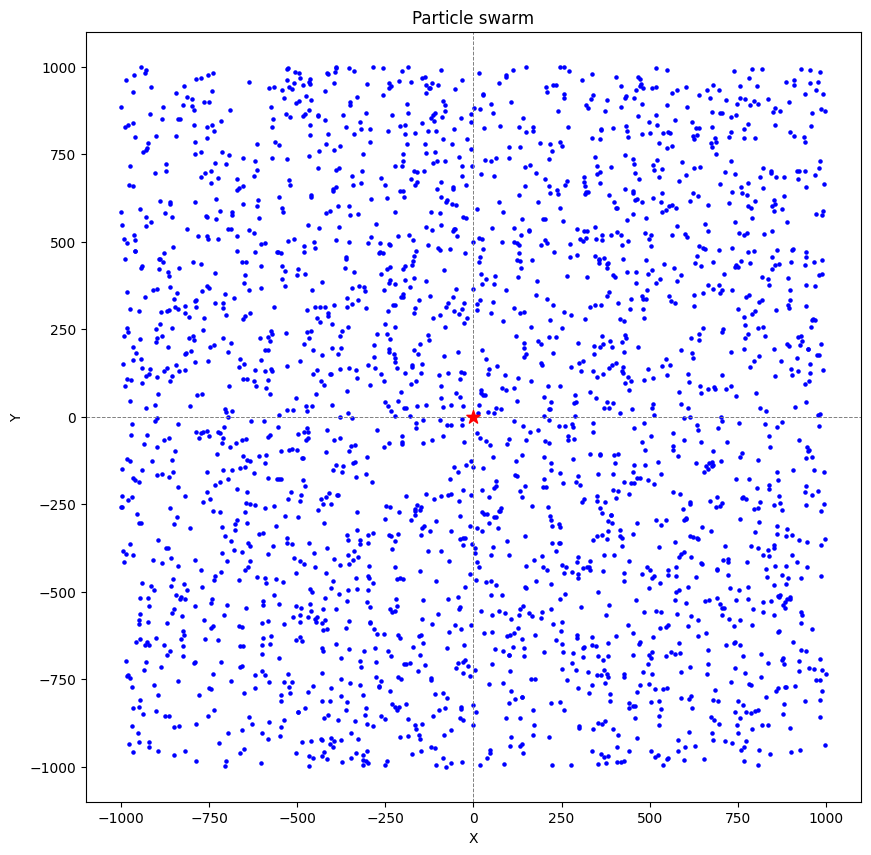

In [85]:
swarm = Swarm(2500, [-1000, 1000], c1=1.8, c2=2, inertia=0.4)
plot(swarm)

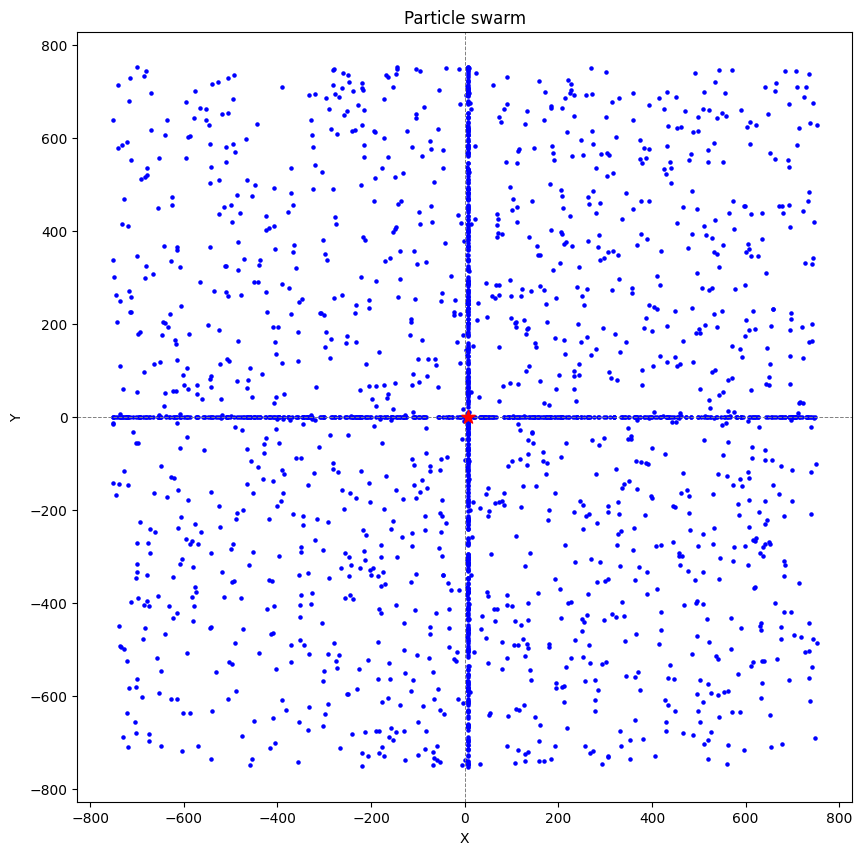

In [86]:
swarm.update(50)
plot(swarm)

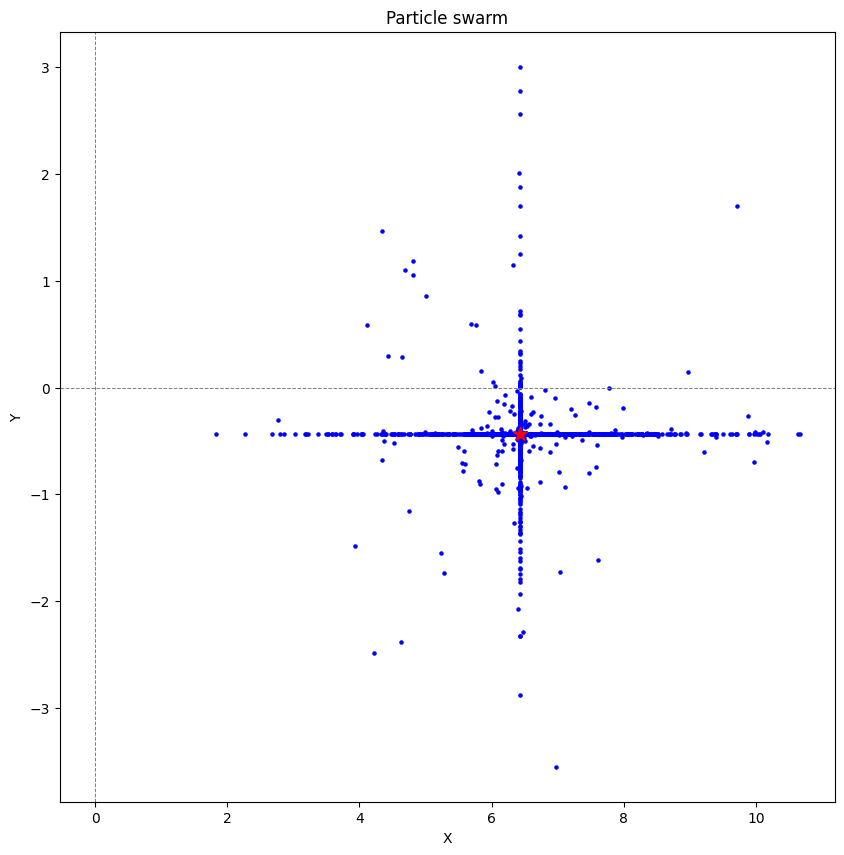

In [87]:
swarm.update(450)
plot(swarm)

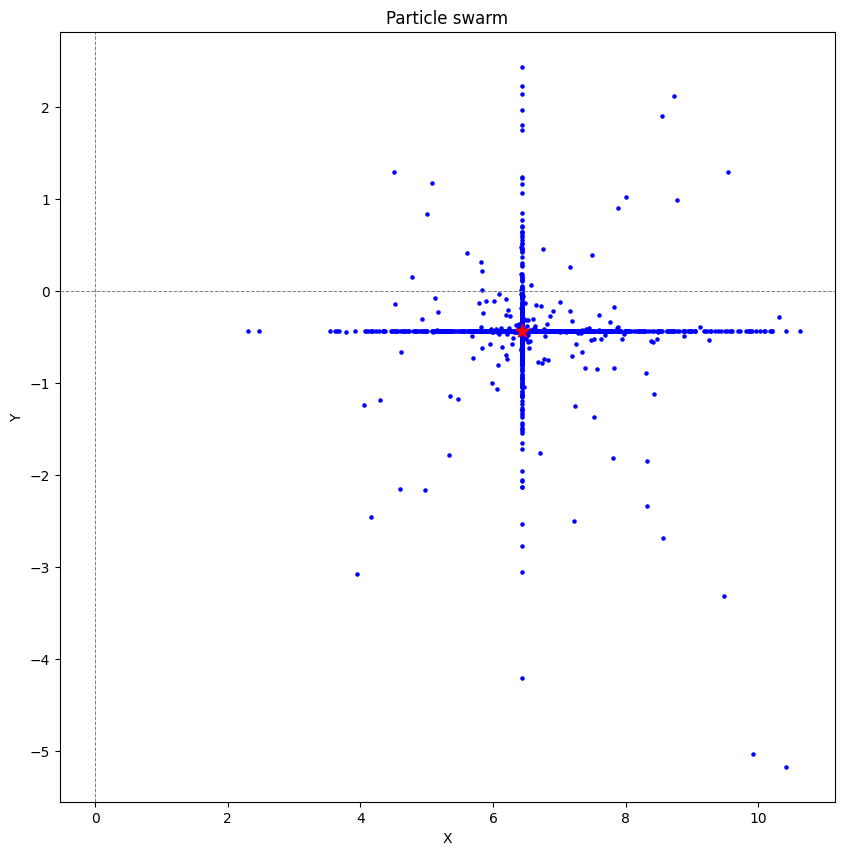

In [88]:
swarm.update(500)
plot(swarm)

In the previous exercises, we've seen that with our current settings, the swarm finds a solution, but it is suboptimal. Additionally, the parameters are probably too large, seeing how the shape of the swarm is not particularly what we can call a circle. To solve this we'll lower the inertia weight, and prioritize the social component.


In the above visualizations we can see how the particle distribution evolves over time, using tuned parameters.

In the first example, the particles are randomly distributed. 

In the second plot, we can see that the particles have distributed to a cross pattern again.

In the the third plot (500 loops), we can see that the particles have completely converged towards the center of the search space, though still in a cross pattern. Looking at the axis limits, we can see that the particles have found a good solution, especially compared to chapter 3 plots.

In the final plot (1000 loops total), the same shape is present, though the y-axis is slightly more optimized. It seems the optima has been reached.